# Graph Visualization

By Eddie Xu and Mohamed Hassan-El Serafi

This week's assignment is to:

Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.
Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 10

# Dolphins Network Analysis

Using a dolp

In [3]:
cols = ["node1", "node2"]
path = 'https://raw.githubusercontent.com/moham6839/Data_620_Web_Analytics/refs/heads/main/Week_3/mammalia-dolphin-social.edges'
dolphins_df = pd.read_csv( path, header = None, delimiter=' ' )
dolphins_df.columns = cols
print( dolphins_df.shape )
dolphins_df.head()

(159, 2)


,node1,node2
0,1,41
1,1,11
2,1,46
3,1,49
4,1,18


In [4]:
dolphins = nx.from_pandas_edgelist(dolphins_df, "node1", "node2")

In [5]:
dolphins

In [6]:
G = nx.Graph(dolphins)

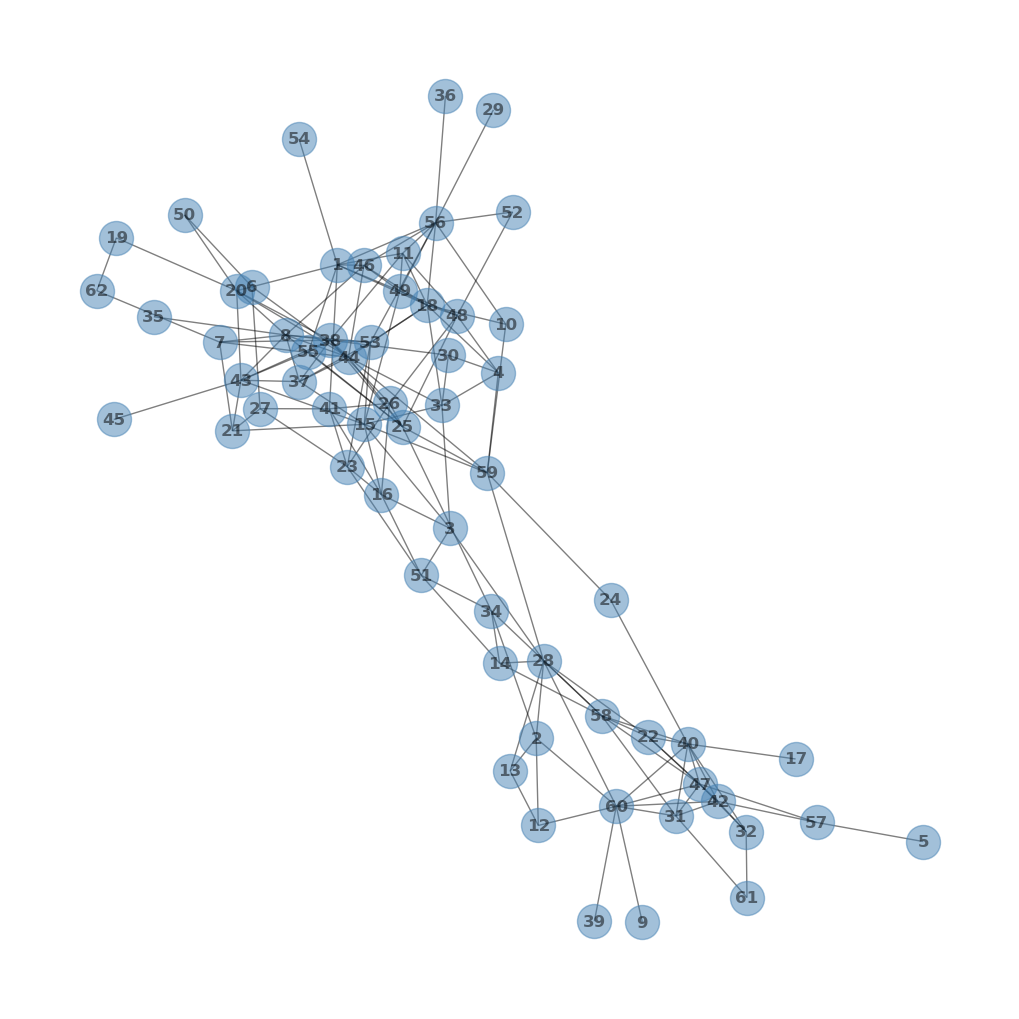

In [7]:
random.seed(42)
nx.draw(dolphins, with_labels=True, node_color="steelblue", node_size=600, font_weight='bold', 
        edge_color="black", alpha=0.5)

In [8]:
nx.diameter(G)

8

In [9]:
nx.radius(G)

5

## Degree of Connections

In [10]:
degree_dolphins = nx.degree(G)

In [11]:
min(dict(degree_dolphins).values())

1

In [12]:
max(dict(degree_dolphins).values())

12

In [13]:
dolphins_sorted = sorted(dict(degree_dolphins).items(), key=lambda item: item[1], reverse=True)

In [14]:
top_10_dolphins_degree = dolphins_sorted[:10]

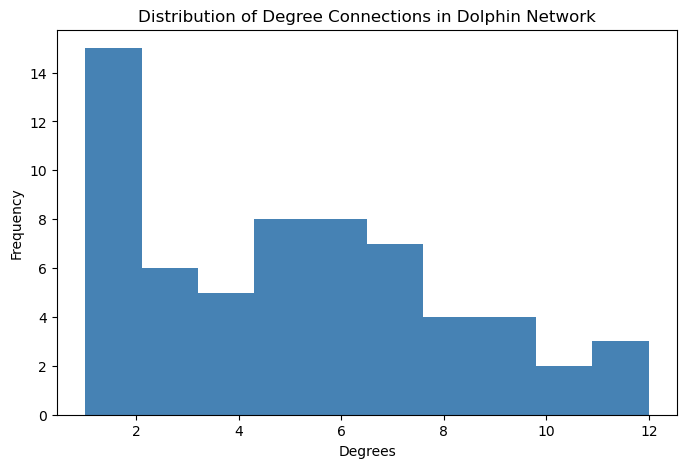

In [15]:
plt.figure(figsize=(8,5))
plt.hist(dict(dolphins_sorted).values(), color = "steelblue")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Connections in Dolphin Network');

## Degree Centrality

In [16]:
dolphins_dc = nx.degree_centrality(G) 

In [17]:
min(dict(dolphins_dc).values())

0.01639344262295082

In [18]:
max(dict(dolphins_dc).values())

0.19672131147540983

In [19]:
dolphins_dc_sorted = sorted(dolphins_dc.items(), key=lambda item: item[1], reverse=True)

In [20]:
top_10_dolphins_dc = dolphins_dc_sorted[:10]

In [21]:
top_10_dolphins_dc

[(38, 0.19672131147540983),
 (18, 0.18032786885245902),
 (44, 0.18032786885245902),
 (56, 0.1639344262295082),
 (8, 0.1639344262295082),
 (1, 0.14754098360655737),
 (60, 0.14754098360655737),
 (15, 0.14754098360655737),
 (40, 0.14754098360655737),
 (28, 0.13114754098360656)]

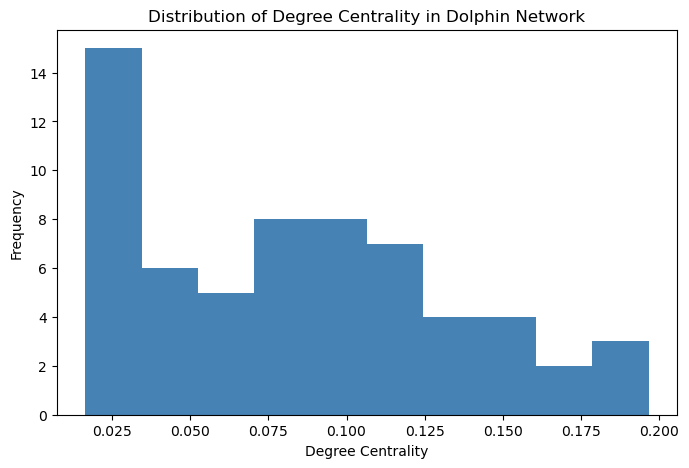

In [22]:
plt.figure(figsize=(8,5))
plt.hist(dict(dolphins_dc_sorted).values(), color = "steelblue")
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Centrality in Dolphin Network');

In [23]:

# # Calculate degree centrality

# degree_centrality = nx.degree_centrality(G) 



# # Sort by degree centrality in descending order

# sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)



# # Get top 10 nodes

# top_10_nodes = sorted_degree_centrality[:10] 



# print(top_10_nodes) 

In [24]:
# dolphin_ecc = pd.DataFrame((nx.eccentricity(dolphins).values()))[0].value_counts().sort_index()

# plot = dolphin_ecc.plot(kind='bar',
#                         color = "skyblue",
#                         figsize=(7,4),
#                         title="Dolphins eccentricity")
# plot.set_xlabel("Eccentricity")
# plot.set_ylabel("Frequency");

## Betweenness Centrality

In [25]:
dolphins_betweenness = nx.betweenness_centrality(G)

In [26]:
min(dict(dolphins_betweenness).values())

0.0

In [27]:
max(dict(dolphins_betweenness).values())

0.24823719602893807

In [28]:
dolphins_btwn_sorted = sorted(dolphins_betweenness.items(), key=lambda item: item[1], reverse=True)

In [29]:
top_10_dolphins_btwn = dolphins_btwn_sorted[:10]

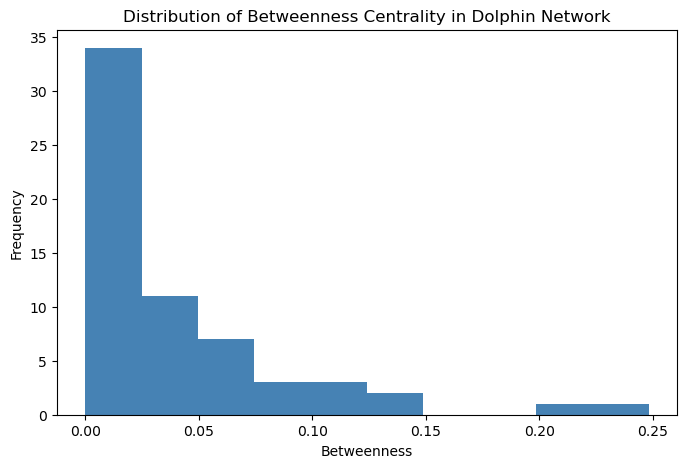

In [30]:
plt.figure(figsize=(8,5))
plt.hist(dict(dolphins_btwn_sorted).values(), color = "steelblue")
plt.xlabel('Betweenness')
plt.ylabel('Frequency')
plt.title('Distribution of Betweenness Centrality in Dolphin Network');

## Closeness Centrality

In [31]:
dolphins_closeness = nx.closeness_centrality(dolphins)

In [32]:
min(dict(dolphins_closeness).values())

0.1783625730994152

In [33]:
max(dict(dolphins_closeness).values())

0.4178082191780822

In [34]:
# Find the top ten
dolphinscc_sorted = sorted(dict(dolphins_closeness).items(), key=lambda item: item[1], reverse=True)

In [35]:
top_10_dolphins_cc = dolphinscc_sorted[:10]

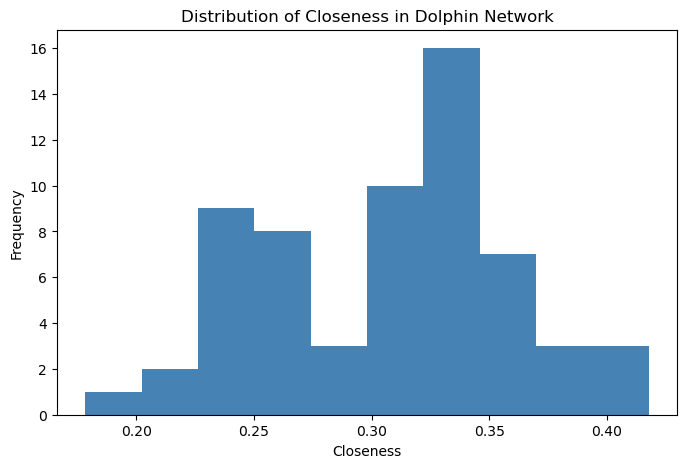

In [36]:
plt.figure(figsize=(8,5))
plt.hist(dict(dolphinscc_sorted).values(), color = "steelblue")
plt.xlabel('Closeness')
plt.ylabel('Frequency')
plt.title('Distribution of Closeness in Dolphin Network');

## Putting it Altogether

In [37]:
# names1 = [x[0] for x in top_10_dolphins_dc]
# names2 = [x[0] for x in top_10_dolphins_btwn]
# names3 = [x[0] for x in top_10_dolphins_cc]


# ## use Python sets to compute a union of the sets 
# names = list(set(names1) | set(names2) | set(names3))

# ## build a table with centralities 
# data = [[name,dolphins_dc[name],dolphins_betweenness[name],dolphins_closeness[name]] for name in names]
# pd.DataFrame.from_records(data, columns=['Dolphin', 'Degree', 'Betweenness', 'Closeness'])

In [38]:
names1 = [x[0] for x in top_10_dolphins_degree]
names2 = [x[0] for x in top_10_dolphins_dc]
names3 = [x[0] for x in top_10_dolphins_btwn]
names4 = [x[0] for x in top_10_dolphins_cc]


## use Python sets to compute a union of the sets 
names = list(set(names1) | set(names2) | set(names3) | set(names4))

## build a table with centralities 
data = [[name,degree_dolphins[name], dolphins_dc[name],dolphins_betweenness[name],dolphins_closeness[name]] for name in names]
pd.DataFrame.from_records(data, columns=['Dolphin', 'Degree', 'Degree Centrality', 'Betweenness', 'Closeness'])

,Dolphin,Degree,Degree Centrality,Betweenness,Closeness
0,1,9,0.147541,0.065529,0.322751
1,3,5,0.081967,0.066757,0.365269
2,8,10,0.163934,0.057166,0.365269
3,15,9,0.147541,0.102646,0.391026
4,18,11,0.180328,0.040670,0.346591
5,25,8,0.131148,0.143150,0.403974
6,28,8,0.131148,0.213324,0.371951
7,33,6,0.098361,0.022366,0.363095
8,34,5,0.081967,0.118239,0.365269
9,38,12,0.196721,0.061972,0.376543


# Wildbird

In [39]:
cols = ["node1", "node2", "node3"]
path = 'https://raw.githubusercontent.com/moham6839/Data_620_Web_Analytics/refs/heads/main/Week_3/aves-wildbird-network-3.edges'
birds_df = pd.read_csv( path, header = None, delimiter=' ' )
birds_df.columns = cols
print(birds_df.shape )
birds_df.head()

(1615, 3)


,node1,node2,node3
0,132,73,0.030303
1,132,74,0.008403
2,132,11,0.044776
3,132,12,0.054545
4,132,99,0.044444


In [40]:
birds = nx.from_pandas_edgelist(birds_df, "node1", "node2", "node3")

In [41]:
birds

In [42]:
G2 = nx.Graph(birds)

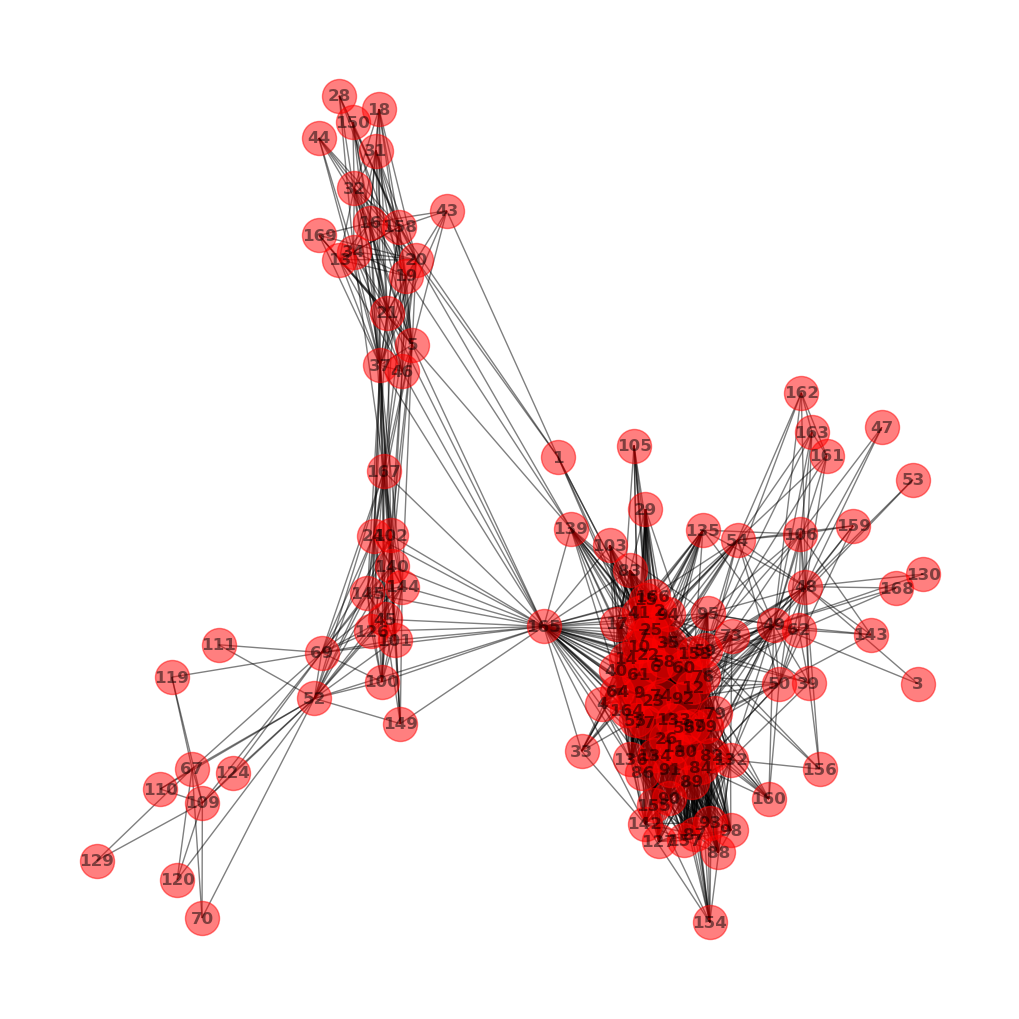

In [43]:
random.seed(42)
nx.draw(birds, with_labels=True, node_color="red", node_size=600, font_weight='bold', 
        edge_color="black", alpha=0.5)

In [44]:
nx.diameter(G2)

6

In [45]:
nx.radius(G2)

3

## Degree of Connections

In [46]:
degree_birds = nx.degree(G2)

In [47]:
min(dict(degree_birds).values())

2

In [48]:
max(dict(degree_birds).values())

58

In [49]:
birds_sorted = sorted(dict(degree_birds).items(), key=lambda item: item[1], reverse=True)

In [50]:
top_10_birds_degree = birds_sorted[:10]

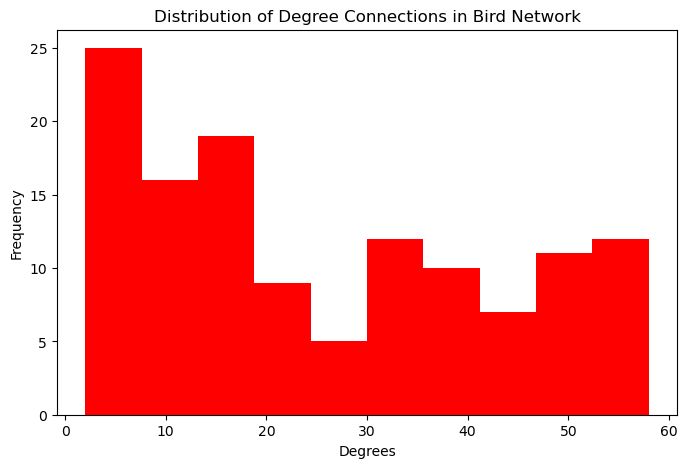

In [51]:
plt.figure(figsize=(8,5))
plt.hist(dict(birds_sorted).values(), color = "red")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Connections in Bird Network');

## Degree Centrality

In [52]:
birds_dc = nx.degree_centrality(G2) 

In [53]:
min(dict(birds_dc).values())

0.016

In [54]:
max(dict(birds_dc).values())

0.464

In [55]:
birds_dc_sorted = sorted(birds_dc.items(), key=lambda item: item[1], reverse=True)

In [56]:
top_10_birds_dc = birds_dc_sorted[:10]

In [57]:
top_10_birds_dc

[(58, 0.464),
 (12, 0.456),
 (153, 0.456),
 (59, 0.456),
 (165, 0.456),
 (74, 0.448),
 (26, 0.448),
 (23, 0.44),
 (60, 0.432),
 (6, 0.432)]

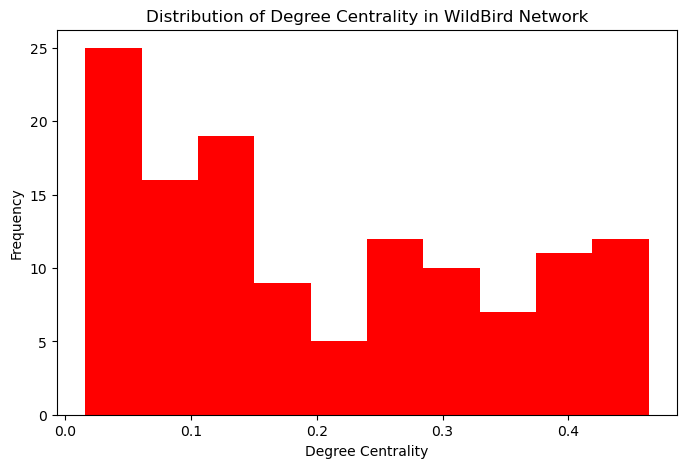

In [58]:
plt.figure(figsize=(8,5))
plt.hist(dict(birds_dc_sorted).values(), color = "red")
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Centrality in WildBird Network');

## Betweenness Centrality

In [59]:
birds_betweenness = nx.betweenness_centrality(G2)

In [60]:
min(dict(birds_betweenness).values())

0.0

In [61]:
max(dict(birds_betweenness).values())

0.3756950514271825

In [62]:
birds_btwn_sorted = sorted(birds_betweenness.items(), key=lambda item: item[1], reverse=True)

In [63]:
top_10_birds_btwn = birds_btwn_sorted[:10]

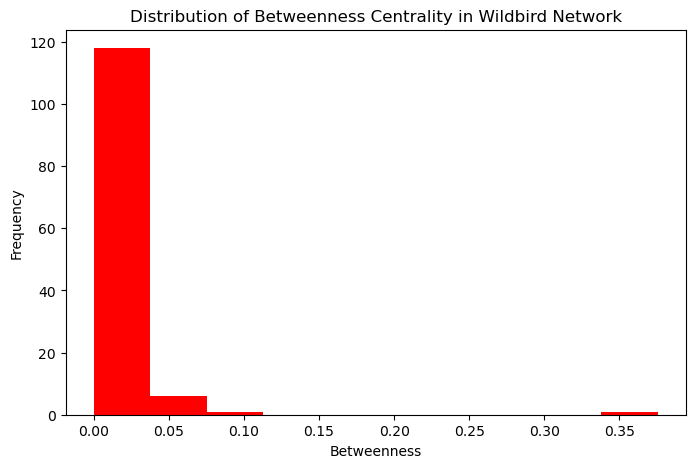

In [64]:
plt.figure(figsize=(8,5))
plt.hist(dict(birds_btwn_sorted).values(), color = "red")
plt.xlabel('Betweenness')
plt.ylabel('Frequency')
plt.title('Distribution of Betweenness Centrality in Wildbird Network');

## Closeness Centrality

In [65]:
birds_closeness = nx.closeness_centrality(birds)

In [66]:
min(dict(birds_closeness).values())

0.23674242424242425

In [67]:
max(dict(birds_closeness).values())

0.6218905472636815

In [68]:
# Find the top ten
birdscc_sorted = sorted(dict(birds_closeness).items(), key=lambda item: item[1], reverse=True)

In [69]:
top_10_birds_cc = birdscc_sorted[:10]

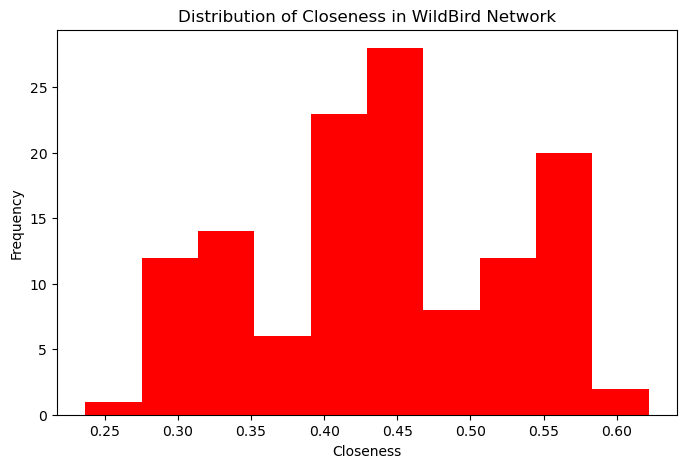

In [70]:
plt.figure(figsize=(8,5))
plt.hist(dict(birdscc_sorted).values(), color = "red")
plt.xlabel('Closeness')
plt.ylabel('Frequency')
plt.title('Distribution of Closeness in WildBird Network');

## Putting it Altogether

In [71]:
bird_names1 = [x[0] for x in top_10_birds_degree]
bird_names2 = [x[0] for x in top_10_birds_dc]
bird_names3 = [x[0] for x in top_10_birds_btwn]
bird_names4 = [x[0] for x in top_10_birds_cc]


## use Python sets to compute a union of the sets 
bird_names = list(set(bird_names1) | set(bird_names2) | set(bird_names3) | set(bird_names4))

## build a table with centralities 
data = [[name,degree_birds[name], birds_dc[name],birds_betweenness[name],birds_closeness[name]] for name in bird_names]
pd.DataFrame.from_records(data, columns=['Bird', 'Degree', 'Degree Centrality', 'Betweenness', 'Closeness'])

,Bird,Degree,Degree Centrality,Betweenness,Closeness
0,69,17,0.136,0.052122,0.425170
1,6,54,0.432,0.009640,0.553097
2,5,22,0.176,0.035071,0.432526
3,74,56,0.448,0.017653,0.563063
4,139,18,0.144,0.037957,0.490196
5,12,57,0.456,0.025961,0.576037
6,11,53,0.424,0.012248,0.565611
7,23,55,0.440,0.013056,0.558036
8,153,57,0.456,0.039356,0.581395
9,26,56,0.448,0.012889,0.573394
